In [45]:
%pylab inline
import sklearn
from sklearn.neighbors import KNeighborsClassifier

Populating the interactive namespace from numpy and matplotlib


In [81]:
I=array([[1.0,0.0],[0.0,1.0]])
bk=random.multivariate_normal([1.1,0],I,10)
nk=random.multivariate_normal([0,1.1],I,10)
numB=500;
numN=500;

X=zeros([numB+numN,3])
for i in range(numB):
    a=random.randint(0,9)
    [[blue,point]]=random.multivariate_normal(bk[a],I/5,1)
    X[i]=[1.0,blue,point]
    

for i in arange(numN)+numB:
    a=random.randint(0,9)
    [[orange,Point]]=random.multivariate_normal(nk[a],I/5,1)
    X[i]=[1.0,orange,Point]   

    


Y=transpose(append(zeros(numB),ones(numN)))
B=dot(linalg.inv(dot(transpose(Xtrain),Xtrain)),dot(transpose(Xtrain),Y))

(-1.898418145589102, 4.3180961106043458)

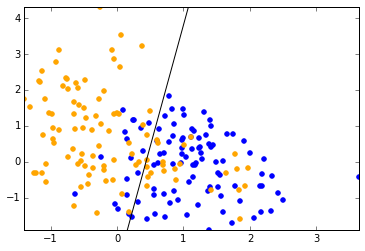

In [82]:
xmin,xmax,ymin,ymax=[min(Xtrain[:,1]),max(Xtrain[:,1]),min(Xtrain[:,2]),max(Xtrain[:,2])]
XLine=array([xmin,xmax])
yLine=-(XLine*B[1]+B[0]-0.5)/B[2]
scatter(Xtrain[:numB,1],Xtrain[:numB,2],color='b')
scatter(Xtrain[numB:,1],Xtrain[numB:,2],color='#FFA500')
plot(XLine,yLine,color='k')
xlim([xmin,xmax])
ylim([ymin,ymax])

0.83


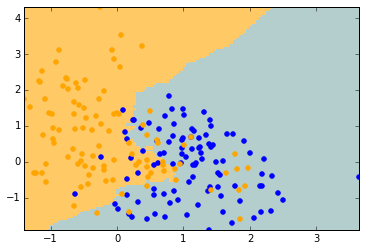

In [87]:
h=0.05
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(Xtrain[:,1:],Y)
xx, yy = meshgrid(arange(xmin, xmax+0.5, h),
                         arange(ymin, ymax+0.5, h))
cmap_light = matplotlib.colors.ListedColormap(['#B4CDCD', '#ffc966'])
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
figure()
pcolormesh(xx, yy, Z, cmap=cmap_light)
scatter(Xtrain[:numB,1],Xtrain[:numB,2],color='b')
scatter(Xtrain[numB:,1],Xtrain[numB:,2],color='#FFA500')
xlim([xmin,xmax])
ylim([ymin,ymax])

(-1.898418145589102, 4.3180961106043458)

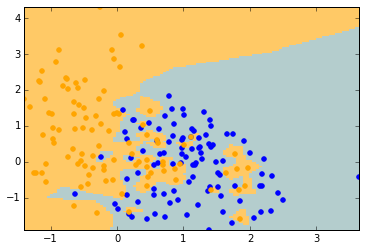

In [84]:
h=0.05
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(Xtrain[:,1:],Y)
xx, yy = meshgrid(arange(xmin, xmax+0.5, h),
                         arange(ymin, ymax+0.5, h))
cmap_light = matplotlib.colors.ListedColormap(['#B4CDCD', '#ffc966'])
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
figure()
pcolormesh(xx, yy, Z, cmap=cmap_light)
scatter(Xtrain[:numB,1],Xtrain[:numB,2],color='b')
scatter(Xtrain[numB:,1],Xtrain[numB:,2],color='#FFA500')
xlim([xmin,xmax])
ylim([ymin,ymax])

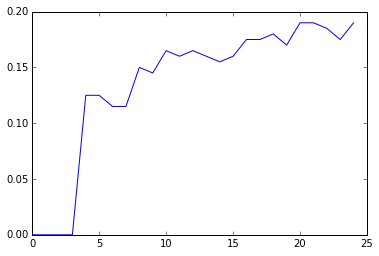

In [108]:
n=25
scoreTrain=zeros(n)
scoreTest=zeros(n)

for i,j in zip(logspace(0,2,n),range(n)):
    neigh = KNeighborsClassifier(n_neighbors=int(i))
    neigh.fit(Xtrain[:,1:],Y)
    scoreTrain[j]=1-neigh.score(Xtrain[:,1:],Y)
    
plot(score)

In [100]:
logspace(0,2,10)

array([   1.        ,    1.66810054,    2.7825594 ,    4.64158883,
          7.74263683,   12.91549665,   21.5443469 ,   35.93813664,
         59.94842503,  100.        ])